# CSCI 4220U - Computer Vision

## Lab on Classification

**Instructor: faisal.qureshi@uoit.ca**

### Goal

The goal is to recognize hand-written digits using nearest-neighbours classifier.

### Setup

- Download mnist data set from http://yann.lecun.com/exdb/mnist/
    - train-images-idx3-ubyte.gz:  training set images (9912422 bytes) 
    - train-labels-idx1-ubyte.gz:  training set labels (28881 bytes) 
    - t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes) 
    - t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)
- Copy the files to './mnist-dataset'
- Install bob.db.mnist.  If using anaconda distribution, run the following command: `conda install -c conda-forge bob.db.mnist=2.0.6`

### Load training data and visualize it

In [1]:
import bob.db.mnist
db = bob.db.mnist.Database('./mnist-dataset')
images, labels = db.data(groups='train', labels=[0,1,2,3,4,5,6,7,8,9])

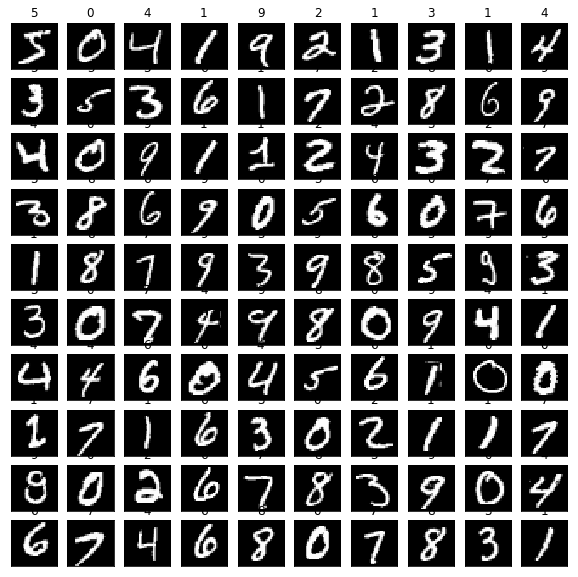

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

start_idx = 0
nx, ny = 10, 10
plt.figure(figsize=(nx,ny))
for i in range(0, nx * ny):
    plt.subplot(nx, ny, i+1)
    plt.title('%s' % labels[start_idx + i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[start_idx+i, :].reshape([28, 28]), cmap='gray')

### Lets load test data and visualize it

In [3]:
test_images, test_labels = db.data(groups='test', labels=[0,1,2,3,4,5,6,7,8,9])

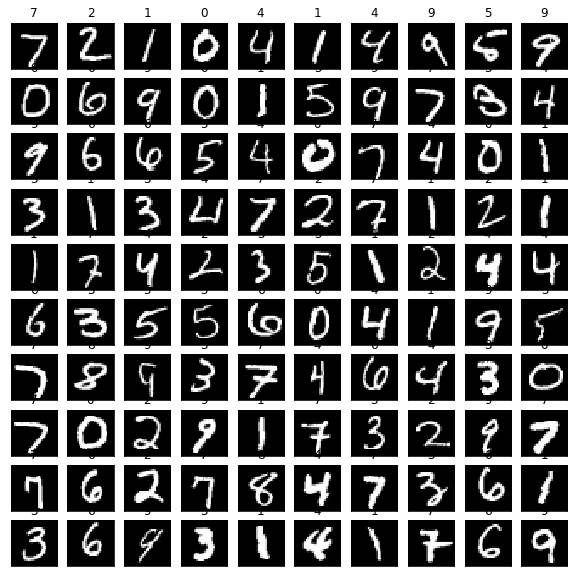

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

start_idx = 0
nx, ny = 10, 10
plt.figure(figsize=(nx,ny))
for i in range(0, nx * ny):
    plt.subplot(nx, ny, i+1)
    plt.title('%s' % test_labels[start_idx + i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[start_idx+i, :].reshape([28, 28]), cmap='gray')


### TODO 

See if you can setup a KNN classifier for recognizing hand-written digits in the test set.  *Notice that we have ground truth available, i.e., we do have labels for every test image.*  We can use the ground truth to objectively evaluate the performance of our classifier.

As discussed in the lectures, feature vectors can have a large effect on the performance of a classifier.  Feel free to try out different feature vectors and see if you can improve the performance of your classifier.  The base case is to use pixel intensities (i.e., a 28 x 28 vector) as your feature vector.

#### BONUS

In all likelihood, KNN classifer wouldn't work so well.  Feel free to experiment with more complex models, such as neural networks, etc.

### Submission

Please submit your files (Python notebooks) via Blackboard.

In [9]:
import numpy as np
from scipy import spatial
traintree = spatial.KDTree(images)

In [10]:
knn = traintree.query(test_images)

In [11]:
knn_labels = labels[knn[1]]

In [12]:
print knn_labels

[7 2 1 ..., 4 5 6]


In [13]:
mask = (knn_labels == test_labels)

In [14]:
print mask # successful classifications

[ True  True  True ...,  True  True  True]


In [15]:
print knn

(array([ 104.01922899,  116.50751049,   68.19824045, ...,  115.82314104,
        127.08658466,  124.1329932 ]), array([ 3423, 30211, 58741, ..., 15035, 17239, 45127]))


In [16]:
mask.shape

(10000,)

In [17]:
success = np.sum(np.ones(mask.size)*mask)
print "classification accuracy is %f" % (success/mask.size)

classification accuracy is 0.529700
